In [4]:
import os
import matplotlib.pyplot as plt

folder_path = "C:\\Users\\ouali\\OneDrive"  # Remplacez par le chemin de votre dossier local

# Vérifier si le chemin du dossier existe
if os.path.exists(folder_path) and os.path.isdir(folder_path):
    # Parcourir tous les fichiers dans le dossier
    for file_name in os.listdir(folder_path):
        # Chemin complet du fichier
        file_path = os.path.join(folder_path, file_name)
        
        # Vérifier si le chemin est un fichier
        if os.path.isfile(file_path):
            print("Nom du fichier :", file_name)
            print("Chemin complet :", file_path)
            print("Taille du fichier :", os.path.getsize(file_path), "octets")
            print("----")
else:
    print("Le chemin du dossier n'existe pas ou n'est pas un dossier valide.")


Nom du fichier : .849C9593-D756-4E56-8D6E-42412F2A707B
Chemin complet : C:\Users\ouali\OneDrive\.849C9593-D756-4E56-8D6E-42412F2A707B
Taille du fichier : 63 octets
----
Nom du fichier : Coffre-fort.lnk
Chemin complet : C:\Users\ouali\OneDrive\Coffre-fort.lnk
Taille du fichier : 1164 octets
----
Nom du fichier : desktop.ini
Chemin complet : C:\Users\ouali\OneDrive\desktop.ini
Taille du fichier : 96 octets
----
Nom du fichier : Document 1.docx
Chemin complet : C:\Users\ouali\OneDrive\Document 1.docx
Taille du fichier : 11059 octets
----
Nom du fichier : Document 2.docx
Chemin complet : C:\Users\ouali\OneDrive\Document 2.docx
Taille du fichier : 2289222 octets
----
Nom du fichier : Document 3.docx
Chemin complet : C:\Users\ouali\OneDrive\Document 3.docx
Taille du fichier : 853827 octets
----
Nom du fichier : Présentation 1.pptx
Chemin complet : C:\Users\ouali\OneDrive\Présentation 1.pptx
Taille du fichier : 27924 octets
----
Nom du fichier : Présentation 2.pptx
Chemin complet : C:\Users\o

In [14]:
reward_abk= []


In [31]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.ppo import MlpPolicy

env = gym.make("CartPole-v1")
expert = PPO(
    policy=MlpPolicy,
    env=env,
    seed=0,
    batch_size=128,
    ent_coef=0.0,
    learning_rate=0.0001,
    n_epochs=128,
    n_steps=128,
)
expert.learn(5000)  # Note: set to 100000 to train a proficient expert

In [24]:
import tempfile
import gym
import numpy as np
from stable_baselines3.common.vec_env import DummyVecEnv

from imitation.algorithms import bc
from imitation.algorithms.dagger import SimpleDAggerTrainer

venv = DummyVecEnv([lambda: gym.make("CartPole-v1")])


bc_trainer = bc.BC(
    observation_space=env.observation_space,
    action_space=env.action_space,
    rng=np.random.default_rng(),
)

with tempfile.TemporaryDirectory(prefix="dagger_example_") as tmpdir:
    print(tmpdir)
    dagger_trainer = SimpleDAggerTrainer(
        venv=venv,
        scratch_dir=tmpdir,
        expert_policy=expert,
        bc_trainer=bc_trainer,
        rng=np.random.default_rng(),
    )

    dagger_trainer.train(2000)

C:\Users\ouali\AppData\Local\Temp\dagger_example_2lsjdh80


0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000693 |
|    entropy        | 0.693     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 36.5      |
|    loss           | 0.693     |
|    neglogp        | 0.693     |
|    prob_true_act  | 0.5       |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 31        |
|    return_mean    | 19.6      |
|    return_min     | 11        |
|    return_std     | 7.31      |
---------------------------------


45batch [00:00, 96.24batch/s]
92batch [00:00, 113.18batch/s][A
129batch [00:01, 114.90batch/s][A
177batch [00:01, 114.56batch/s]
184batch [00:01, 104.16batch/s]
0batch [00:00, ?batch/s]

---------------------------------
| batch_size        | 32        |
| bc/               |           |
|    batch          | 0         |
|    ent_loss       | -0.000285 |
|    entropy        | 0.285     |
|    epoch          | 0         |
|    l2_loss        | 0         |
|    l2_norm        | 49.6      |
|    loss           | 0.251     |
|    neglogp        | 0.251     |
|    prob_true_act  | 0.832     |
|    samples_so_far | 32        |
| rollout/          |           |
|    return_max     | 130       |
|    return_mean    | 73.2      |
|    return_min     | 45        |
|    return_std     | 30.8      |
---------------------------------


91batch [00:01, 92.77batch/s]
186batch [00:02, 116.76batch/s]A
267batch [00:02, 111.35batch/s]
370batch [00:03, 120.02batch/s]
372batch [00:03, 96.73batch/s] 


In [25]:
def calculate_rolling_average(lst, window_size):
    if window_size > len(lst):
        raise ValueError("Window size cannot be larger than the list size.")
    
    rolling_averages = []
    for i in range(len(lst) - window_size + 1):
        window = lst[i:i + window_size]
        average = sum(window) / window_size
        rolling_averages.append(average)
    
    return rolling_averages

493.25
la valeur de rewardest : [500.0, 500.0, 500.0, 500.0, 500.0, 443.0, 500.0, 500.0, 500.0, 394.0, 468.0, 500.0, 430.0, 500.0, 500.0, 500.0]
la valeur de asnus est: [500, 500, 500, 500, 500, 443, 500, 500, 500, 394, 468, 500, 430, 500, 500, 500]
la moyenne est  [483.7, 480.5, 480.5, 473.5, 473.5, 473.5, 479.2]


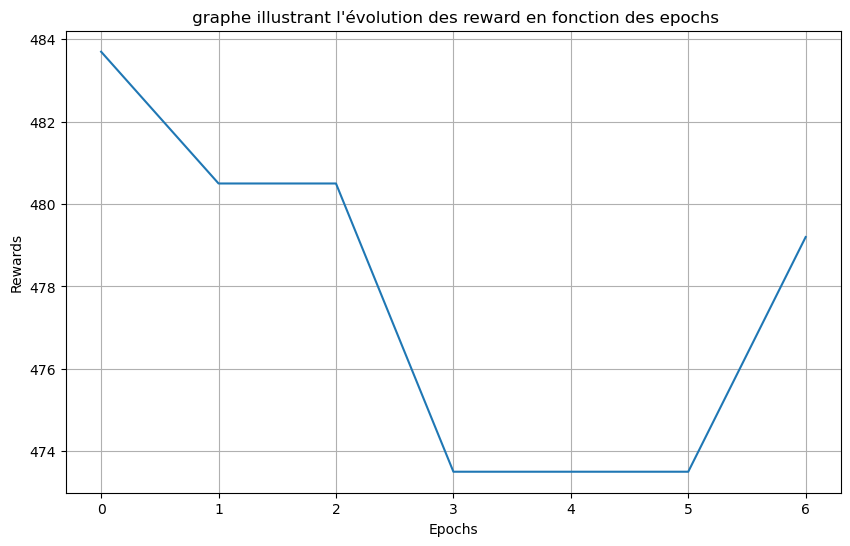

C:\Users\ouali\AppData\Local\Temp\ipykernel_48116\27132506.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [26]:
from stable_baselines3.common.evaluation import evaluate_policy

reward, asnus = evaluate_policy(dagger_trainer.policy, env, 20)
print(reward)
from stable_baselines3.common.evaluation import evaluate_policy

reward, asnus = evaluate_policy(dagger_trainer.policy, env, 16,render= True,return_episode_rewards= True)
t_reward = calculate_rolling_average(reward,10)
print("la valeur de rewardest :",reward)
print("la valeur de asnus est:" ,asnus)
print("la moyenne est ",t_reward)
epoch_1= np.arange(0,7,1)
fig = plt.figure(figsize=(10, 6))
plt.plot(epoch_1,t_reward)
plt.title(" graphe illustrant l'évolution des reward en fonction des epochs")
plt.xlabel("Epochs")
plt.ylabel("Rewards")
plt.grid(True) 
plt.show()
fig.show()


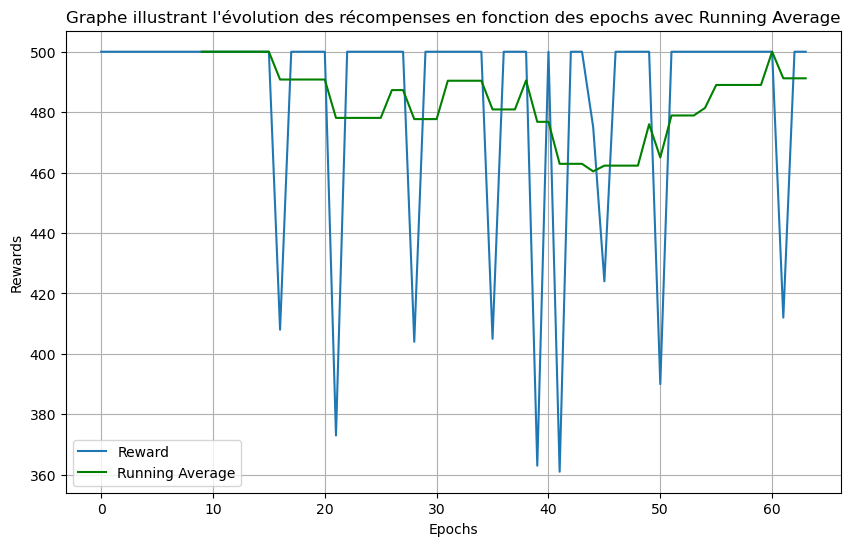

In [29]:
from stable_baselines3.common.evaluation import evaluate_policy
import numpy as np
import matplotlib.pyplot as plt

reward, _ = evaluate_policy(dagger_trainer.policy, env, 64, render=True, return_episode_rewards=True)
mean_reward = np.mean(reward)

epoch_1 = np.arange(0, 64, 1)
fig = plt.figure(figsize=(10, 6))
plt.plot(epoch_1, reward, label='Reward')
window_size = 10
running_average = np.convolve(reward, np.ones(window_size) / window_size, mode='valid')
running_average_time = epoch_1[window_size - 1:]
plt.plot(running_average_time, running_average, color='green', label='Running Average')
plt.title("Graphe illustrant l'évolution des récompenses en fonction des epochs avec Running Average")
plt.xlabel("Epochs")
plt.ylabel("Rewards")
plt.grid(True)
plt.legend()
plt.show()


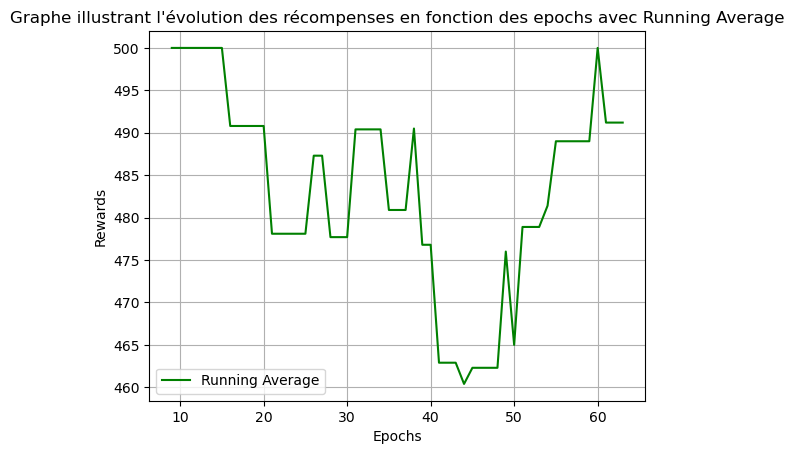

In [30]:
window_size = 10
running_average = np.convolve(reward, np.ones(window_size) / window_size, mode='valid')
running_average_time = epoch_1[window_size - 1:]
plt.plot(running_average_time, running_average, color='green', label='Running Average')
plt.title("Graphe illustrant l'évolution des récompenses en fonction des epochs avec Running Average")
plt.xlabel("Epochs")
plt.ylabel("Rewards")
plt.grid(True)
plt.legend()
plt.show()

[0.30700000000000005, 0.621, 0.858, 0.9414]


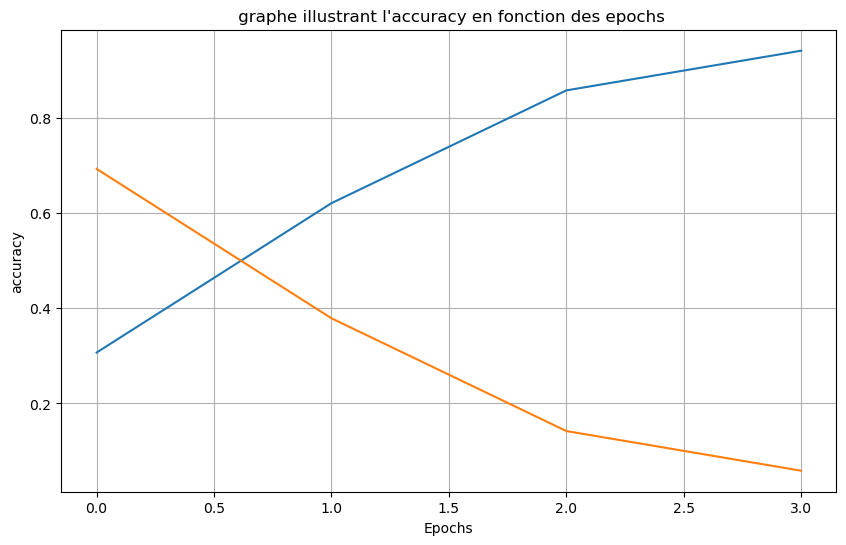

C:\Users\ouali\AppData\Local\Temp\ipykernel_48116\2505496153.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


In [9]:
loss_valeu= [0.693,0.379,0.142,0.0586]
loss_values = [0.693, 0.379, 0.142, 0.0586]

rewards1 = [1 - loss for loss in loss_values]

print(rewards1)
epoch_1= np.arange(0,4,1)
fig = plt.figure(figsize=(10, 6))
plt.plot(epoch_1,rewards1)
plt.plot(epoch_1,loss_values)
plt.title(" graphe illustrant l'accuracy en fonction des epochs")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.grid(True) 
plt.show()
fig.show()
